# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<font color='red'> Reading the csv file </font>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [ ]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [ ]:
from scipy.sparse import csr_matrix
row= data['user_id'].to_numpy()
col= data['item_id'].to_numpy()
rat= data['rating'].to_numpy()
adjacency_matrix=csr_matrix((rat, (row, col)))
# write your code of adjacency matrix here

In [ ]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [ ]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

U, Sigma,VT= randomized_svd(adjacency_matrix, n_components=100,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 100)
(100,)
(1681, 100)


<font color='red'>Compute mean of ratings</font>

In [ ]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    mean= ratings.mean()

    return mean

In [ ]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [ ]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [ ]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    B=[]
    for i in range(dim):
      B.append(0)
    # initalize the value to zeros 
    # return output as a list of zeros 
    return B

In [ ]:
dim= 943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [ ]:
dim= 1681 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [ ]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [ ]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    der_b=(2*alpha*b_i[user_id])-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id,:],V[:,item_id]))
    return der_b


<font color='cyan'>Grader function -4 </font>

In [ ]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [ ]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    der_c=(2*alpha*c_j[item_id])-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id,:],V[:,item_id]))
    return der_c


<font color='cyan'>Grader function - 5 </font>

In [ ]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
b_i=initialize(dim)
c_j=initialize(dim)
epoch_num=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
learning_rate=0.001
alpha=0.01
epoch_list=[]
mean_sq_err=[]
for i in epoch_num:
  for j in range(U.shape[0]): #Unique User IDs = 942
    for k in range(VT.shape[1]): #Unique Item IDs=1680
      rating=adjacency_matrix[j,k]
      b_i[j]=b_i[j]-(learning_rate*derivative_db(j,k,rating,U,VT,mu,alpha))
      c_j[k]=c_j[k]-(learning_rate*derivative_dc(j,k,rating,U,VT,mu,alpha))
  y_pred=csr_matrix((943,1681))
  rows=[]
  columns=[]
  data_1=[]
  for user in range(U.shape[0]):
    for items in range(VT.shape[1]):
      d=mu+b_i[user]+c_j[items]+np.dot(U[user,:],VT[:,items])
      rows.append(user)
      columns.append(items)
      data_1.append(d)
  COLUMNS= np.array(columns)
  ROWS=np.array(rows)
  DATA=np.array(data_1)                                                       
  y_pred=y_pred+csr_matrix((DATA, (ROWS, COLUMNS)), shape=(943,1681)) #For each Epoch we need the Predicted Value
  MSE=mean_squared_error(adjacency_matrix.todense(), y_pred.todense())
  mean_sq_err.append(MSE)
  print("Epoch: ", i)
  print("MSE: ", MSE)
  print('_'*100)


Epoch:  1
MSE:  2.2093459684033645
____________________________________________________________________________________________________
Epoch:  2
MSE:  0.6417352966997463
____________________________________________________________________________________________________
Epoch:  3
MSE:  0.6251544238981376
____________________________________________________________________________________________________
Epoch:  4
MSE:  0.6240820683576371
____________________________________________________________________________________________________
Epoch:  5
MSE:  0.6238547028671342
____________________________________________________________________________________________________
Epoch:  6
MSE:  0.6238284538226656
____________________________________________________________________________________________________
Epoch:  7
MSE:  0.6238292467735228
____________________________________________________________________________________________________
Epoch:  8
MSE:  0.623829196754596
______________

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

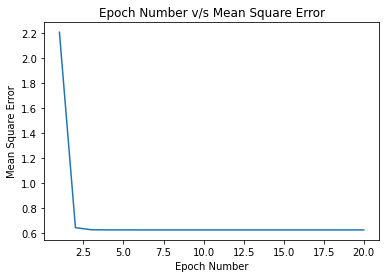

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epoch_num,mean_sq_err)
plt.xlabel("Epoch Number")
plt.ylabel("Mean Square Error")
plt.title("Epoch Number v/s Mean Square Error")
plt.show()

<br>

# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

### Reading the Data

In [ ]:
user_info_data=pd.read_csv("user_info.csv.txt")
user_info_data.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


We will treat User Matrix U as input features and 'is_male' column of 'user_info_data' as output feature and fit Logistic Regression on it.

In [ ]:
y=user_info_data["is_male"]

Stacking user matrix 'U' (from matrix factorization of ratings data) and 'final_user_info_data'

In [ ]:
from scipy import sparse
X=sparse.csr_matrix(U)
print("Shape of User Matrix: ",X.shape)
print("Shape of User Class Label (is_male)",y.shape)


Shape of User Matrix:  (943, 100)
Shape of User Class Label (is_male) (943,)


###Train Test Split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (631, 100)
Shape of X_test (312, 100)
Shape of y_train (631,)
Shape of y_test (312,)


In [ ]:
hp={'penalty':['l1','l2'],'C':[100,10,1,0.1,0.01]} #Hyper Parameters for Logistic Regression, C=Inverse of Learning Rate
clf = LogisticRegression(tol=0.0001,solver='lbfgs', max_iter=100)
G_S = GridSearchCV(clf, param_grid=hp, scoring="roc_auc", cv=5,n_jobs=-1, return_train_score=True)
G_S.fit(X_train,y_train)
print("Train Scores: ", G_S.cv_results_['mean_train_score'])
print("_"*100)
print("CV Scores: ",G_S.cv_results_['mean_test_score'])
print("_"*100)
print("Best Hyper Parameters: ",G_S.best_params_)
print("_"*100)
print("Best AUC Score: ",G_S.best_score_)
print("_"*100)

Train Scores:  [       nan 0.88608712        nan 0.86018263        nan 0.84502378
        nan 0.84195163        nan 0.84160845]
____________________________________________________________________________________________________
CV Scores:  [       nan 0.6984569         nan 0.69175972        nan 0.69111904
        nan 0.69070859        nan 0.69077199]
____________________________________________________________________________________________________
Best Hyper Parameters:  {'C': 100, 'penalty': 'l2'}
____________________________________________________________________________________________________
Best AUC Score:  0.6984569025954792
____________________________________________________________________________________________________


##### Refit Train Data with Best Hyper Parameters and Print Confusion Matrix

AUC Score for Train Data:  0.7307767369242779
____________________________________________________________________________________________________


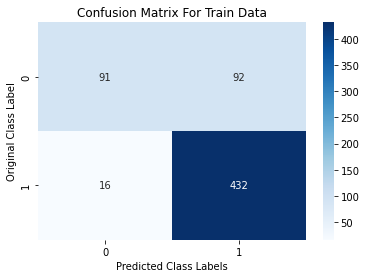

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
model=G_S.best_estimator_ #Model with highest AUC Score above
LR_train=model.fit(X_train,y_train)
y_pred_train=LR_train.predict(X_train)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_pred_train)
print("AUC Score for Train Data: ",auc(train_fpr,train_tpr))
print("_"*100)
confusion_matrix_data_train= confusion_matrix(y_train,y_pred_train)

#Seaborn Heatmap for Confusion Matrix
sns.heatmap(data=confusion_matrix_data_train, annot=True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix For Train Data")
plt.xlabel("Predicted Class Labels")
plt.ylabel("Original Class Label")
plt.show()

##### Fitting the Best Hyper Parameters onto Test Data and Plotting Confusion Matrix

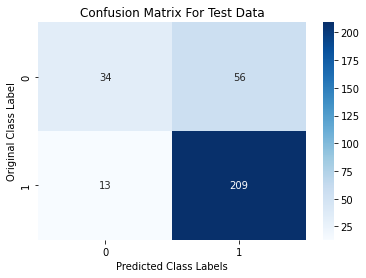

In [ ]:
y_pred_test=LR_train.predict(X_test)
confusion_matrix_data_test=confusion_matrix(y_test,y_pred_test)

sns.heatmap(data=confusion_matrix_data_test, annot=True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix For Test Data")
plt.xlabel("Predicted Class Labels")
plt.ylabel("Original Class Label")
plt.show()


### ROC_AUC Curve

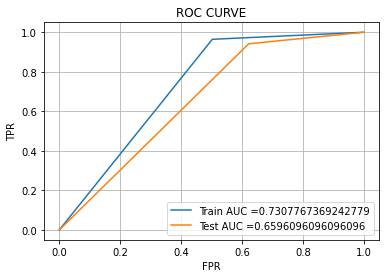

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train,y_pred_train)
test_fpr,test_tpr,te_thresholds= roc_curve(y_test,y_pred_test)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

# CONCLUSION

* We have fit Logistic Regression on User Matrix U as input features and 'is_male' as class label and performed binary classification task.

* We are getting a Train AUC Score of 0.73 and Test AUC Score of 0.65. Hence the Logistic Regression model is performing fairly well.

* Hence we might conclude that that whether the user is male or not definitely has some impact over the ratings given to movies by the user.



